# FAKE JOB DETECTION

In [1]:
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#!pip install pandas --upgrade

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data

In [12]:
dataset = pd.read_excel(r"fake job posting.xlsx")
dataset.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17871 non-null  object
 7   requirements         15146 non-null  object
 8   benefits             10637 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [15]:
dataset.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                9
requirements            2734
benefits                7243
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

#### Initial Data Cleaning For EDA

In [16]:
#dataset['telecommuting'].unique()
dataset['telecommuting'].value_counts()

telecommuting
0    17113
1      767
Name: count, dtype: int64

In [17]:
#dataset['has_company_logo'].unique()
dataset['has_company_logo'].value_counts()

has_company_logo
1    14220
0     3660
Name: count, dtype: int64

In [18]:
#dataset['employment_type'].unique()
dataset['employment_type'].value_counts()

employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

In [19]:
ds = dataset
columns = ["job_id","salary_range","telecommuting","has_company_logo","has_questions"]
for col in columns:
    del ds[col]    

In [20]:
ds.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
ds.fillna('',inplace = True)

### Visualizations

fraudulent
0    17014
1      866
Name: count, dtype: int64


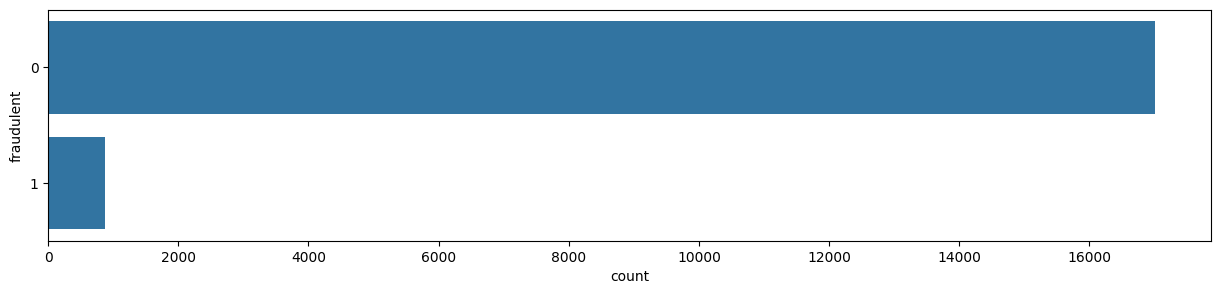

In [21]:
#fraudulent postings in the dataset
print(ds['fraudulent'].value_counts())
plt.figure(figsize=(15,3))
sns.countplot(y=ds['fraudulent'],data=ds)
plt.show()

Top 10 countries where jobs are posted
{'London': 1098, 'New York': 685, 'Athens': 558, 'San Francisco': 485, 'Houston': 273, 'Berlin': 263, 'Chicago': 258, 'Washington': 255, 'Auckland': 234, 'Los Angeles': 192}


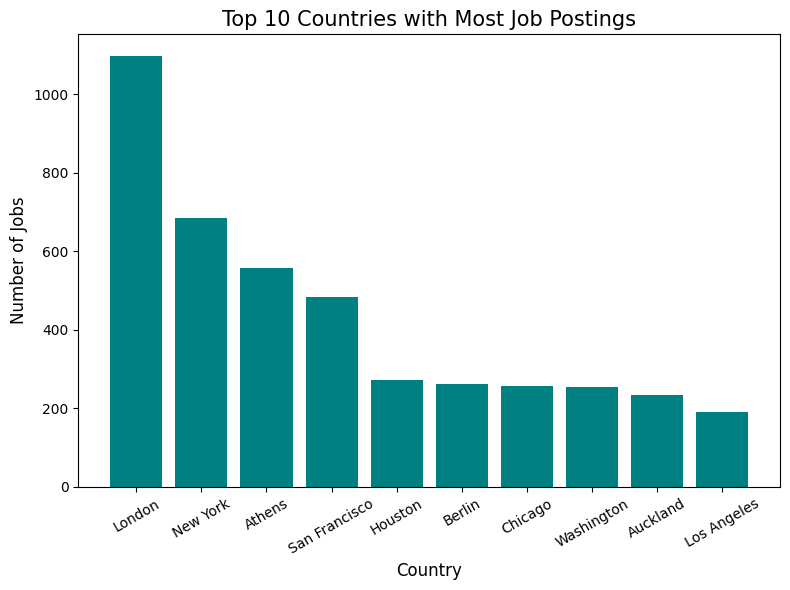

In [26]:
# Safe split function to extract country from location
def split(location):
    if pd.isna(location):
        return 'Unknown'
    parts = location.split(",")
    return parts[-1].strip() if parts else 'Unknown'

# Apply function
ds['country'] = ds['location'].apply(split)

# Count and plot top 10 countries
print("Top 10 countries where jobs are posted")
country_counts = ds['country'].value_counts()

# Remove 'Unknown' or empty strings safely if needed
country_counts = country_counts[country_counts.index != '']
country_counts = country_counts[country_counts.index != 'Unknown']

top10 = dict(country_counts[:10])
print(top10)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(top10.keys(), top10.values(), color='teal')
plt.title("Top 10 Countries with Most Job Postings", size=15)
plt.xlabel("Country", size=12)
plt.ylabel("Number of Jobs", size=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


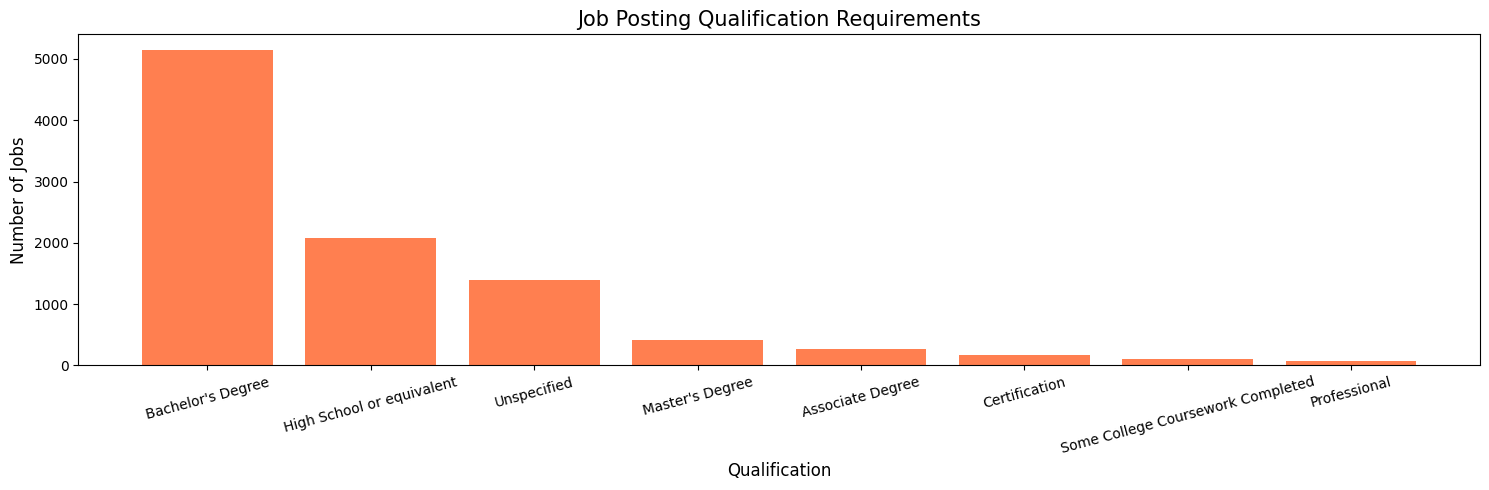

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (if not already loaded)
# ds = pd.read_excel("fake_job_posting_excel.xlsx")  # or read_csv(...)

# Count education levels and safely remove empty strings or NaNs
edu_counts = ds['required_education'].dropna().value_counts()
edu = dict(edu_counts[:8])
edu.pop('', None)  # Safely remove empty string key if it exists

# Plot
plt.figure(figsize=(15, 5))
plt.title("Job Posting Qualification Requirements", size=15)
plt.bar(edu.keys(), edu.values(), color='coral')
plt.ylabel("Number of Jobs", size=12)
plt.xlabel("Qualification", size=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [28]:
#non fraudulent job titles
print(ds[ds.fraudulent == 0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [29]:
#fraudulent job titles
print(ds[ds.fraudulent == 1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


# -----------------------------------------------------------------------------

In [34]:
cat_cols = ds.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols

['title',
 'location',
 'department',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'country']

### Combining all the coloumns together 

In [35]:
# Combine all relevant text fields into a single 'text' column
ds['text'] = (
    ds['title'].astype(str) + ' ' +
    ds['department'].astype(str) + ' ' +
    ds['company_profile'].astype(str) + ' ' +
    ds['description'].astype(str) + ' ' +
    ds['requirements'].astype(str) + ' ' +
    ds['benefits'].astype(str) + ' ' +
    ds['employment_type'].astype(str) + ' ' +
    ds['required_experience'].astype(str) + ' ' +
    ds['required_education'].astype(str) + ' ' +
    ds['industry'].astype(str) + ' ' +
    ds['function'].astype(str)
)

#### Word cloud 

In [37]:
pip install wordcloud spacy

   ---------------------------------------- 0.0/299.8 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.8 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/299.8 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/299.8 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/299.8 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/299.8 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/299.8 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.8 kB 164.1 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/299.8 kB 209.0 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/299.8 kB 210.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.8 kB 210.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.8 kB 210.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.31.0 requires typer<1.0,>=0.12; sys_platform != "emscripten", but you have typer 0.9.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [39]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
#print(STOPWORDS)

fraud_jobs = ds[ds.fraudulent == 1].text
real_jobs = ds[ds.fraudulent == 0].text

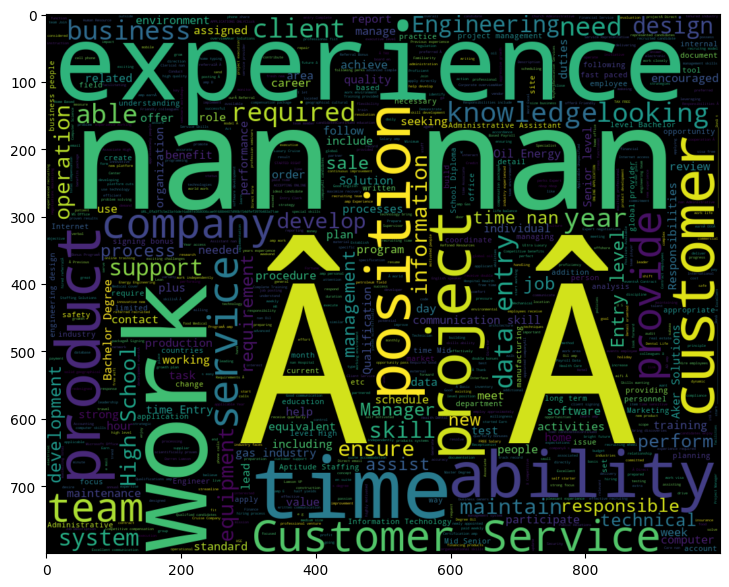

In [40]:
#word cloud of fraudulent jobs

plt.figure(figsize = (10,7))
wc = WordCloud(min_font_size = 3, max_words = 3000 ,width= 1000,height = 800, 
               stopwords = STOPWORDS).generate(str(" ".join(fraud_jobs)))
plt.imshow(wc,interpolation = 'bilinear')

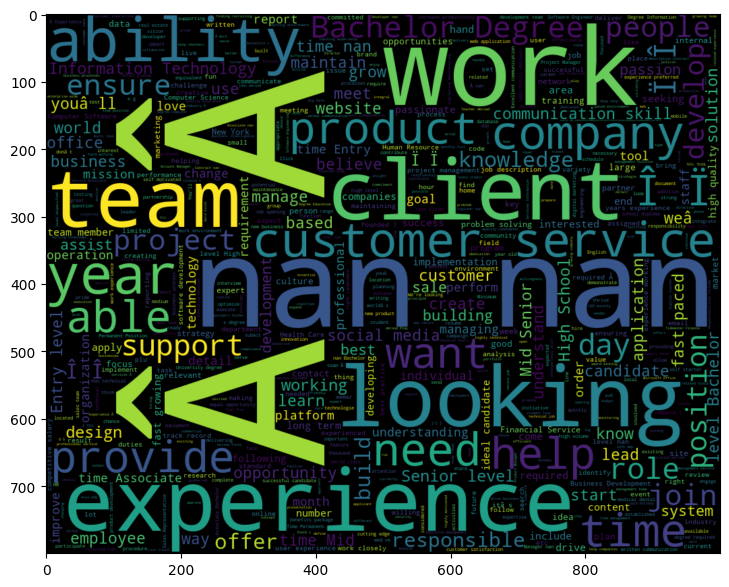

In [41]:
#word cloud of real jobs

plt.figure(figsize = (10,7))
wc = WordCloud(min_font_size = 3, max_words = 3000 ,width= 1000,height = 800, stopwords = STOPWORDS).generate(str(" ".join(real_jobs)))
plt.imshow(wc,interpolation = 'bilinear')

## Pre Processing

In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix

In [44]:
from bs4 import BeautifulSoup
import spacy

stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function to lemmatize the text
load_model = spacy.load('en_core_web_sm',disable = ['parser','ner'])
def lemmatize(text):
    doc = load_model(text)
    tex= " ".join([token.lemma_ for token in doc])
    return tex         


#function to clean the whole text
def clean_text(text):
    #Converting to lowercase
    text = text.lower()
    #Removing emails
    text = re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', text)
    #Removing URLs
    text = re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text)
    #Removing HTML tags
    text = BeautifulSoup(text, 'lxml').get_text()
    #Removing punctuations and numbers
    text = re.sub('[^A-Z a-z ]+', ' ', text)
    #Removing Multiple spaces
    text =  " ".join(text.split())
    #Removing Stop words
    text =  " ".join([t for t in text.split() if t not in stop_words])
    #lemmatizing the text
    text = lemmatize(text)
    return text    

In [45]:
print(ds['text'][0])

Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourc

In [46]:
ds['text'] = ds['text'].apply(clean_text)

C:\Users\USER\AppData\Local\Temp\ipykernel_4356\972432468.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()


In [47]:
print(ds['text'][0])

market intern marketing food ve create groundbreaking award win cook site support connect celebrate home cook need place editorial business engineering team focus technology find new well way connect people specific food interest offer superb highly curate information food cooking attract talente home cook contributor country publish know professional like mario batali gwyneth paltrow danny meyer partnership food market random house food name good food website james beard foundation iacp feature new york times npr pando daily techcrunch today locate chelsea new york city food fast grow james beard award win online food community crowd source curate recipe hub currently interview time unpaid intern work small team editor executive developer new york city headquarters reproduce repackage exist food content number partner sites huffington post yahoo buzzfeed content management systemsresearche blog website provision food affiliate programassisting day day affiliate program support screen 

In [52]:
ds.to_csv('cleaned_dataset.csv', index=False)

In [55]:
nf = pd.read_csv('cleaned_dataset.csv')
nf.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,country,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0,New York,market intern marketing food ve create groundb...
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,Auckland,customer service cloud video production succes...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0,Wever,commission machinery assistant cma nan valor s...
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Washington,account executive washington dc sale passion i...
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Fort Worth,bill review manager nan spotsource solution ll...


### Modeling

In [39]:
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(ds['text'])
ds1 = pd.DataFrame(x.toarray(), columns = cv.get_feature_names_out())
#ds.drop(['text'],axis = 1,inplace = True)
main_ds = pd.concat([ds1,ds.fraudulent], axis = 1)
main_ds.head()

,ability,able,application,bachelor,base,benefit,brand,build,business,candidate,...,understand,url,user,want,web,work,world,write,year,fraudulent
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.087520,0.000000,...,0.000000,0.00000,0.0,0.0,0.000000,0.250500,0.000000,0.000000,0.000000,0
1,0.034723,0.042000,0.041046,0.00000,0.065785,0.000000,0.24222,0.000000,0.121879,0.035352,...,0.083355,0.23223,0.0,0.0,0.043195,0.130817,0.397950,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.201995,...,0.000000,0.00000,0.0,0.0,0.000000,0.124577,0.000000,0.000000,0.000000,0
3,0.045654,0.000000,0.000000,0.09880,0.000000,0.108280,0.00000,0.050843,0.360555,0.000000,...,0.054798,0.00000,0.0,0.0,0.000000,0.085999,0.209291,0.100408,0.071658,0
4,0.000000,0.097382,0.000000,0.17423,0.000000,0.095474,0.00000,0.000000,0.070647,0.000000,...,0.193268,0.00000,0.0,0.0,0.000000,0.151656,0.000000,0.000000,0.063183,0


In [40]:
y = main_ds.iloc[:,-1]
X = main_ds.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12516, 100)
(12516,)
(5364, 100)
(5364,)


#### Random Forest Classifier 

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = 3,oob_score = True,n_estimators=100,criterion = 'entropy')
model_rfc = rfc.fit(X_train,y_train)

C:\Users\sheri\anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [42]:
pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test,pred_rfc) 
print(accuracy_rfc)

0.9720357941834452


In [43]:
print("Report")
print(classification_report(y_test,pred_rfc))
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred_rfc))

Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5106
           1       0.99      0.42      0.59       258

    accuracy                           0.97      5364
   macro avg       0.98      0.71      0.79      5364
weighted avg       0.97      0.97      0.97      5364

Confusion Matrix

[[5105    1]
 [ 149  109]]


#### Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
model_nb = nb.fit(X_train,y_train)

In [45]:
pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test,pred_nb) 
print(accuracy_nb)

0.7641685309470544


#### Support Vector Machine

In [46]:
from sklearn.svm import SVC

svm = SVC(C=1 ,kernel = 'linear', random_state = 1)
model_svm = svm.fit(X_train,y_train)

In [47]:
pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test,pred_svm) 
print(accuracy_svm)

0.9519015659955258


### Saving the model 
##### the more accurate model is random forest 

In [ ]:
import joblib

In [ ]:
joblib.dump(rfc,'model_rfc_joblib')

In [ ]:
m = joblib.load('model_rfc_joblib')